Importing libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [65]:
#import the dataset
data=pd.read_csv("/content/Carvana- Car prices prediction.zip")
data

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [66]:
#display the first 10 rows of the dataframe
data.head(10)

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
5,Buick Encore,2019,47973,18590
6,Jeep Compass,2016,57159,17590
7,Jeep Compass,2017,47619,18590
8,Jeep Patriot,2015,51472,17590
9,Jeep Compass,2016,33218,17990


In [67]:
#display the last 10 rows of the dataframe 
data.tail(10)

,Name,Year,Miles,Price
21990,Nissan Rogue,2015,54894,16990
21991,Chevrolet Cruze,2015,83838,13990
21992,Ford Taurus,2015,93601,15990
21993,Honda Civic,2015,98764,16990
21994,Volkswagen Jetta,2015,66523,14590
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990
21999,Honda Civic,2012,70676,14990


## Understanding the data

In [68]:
data.shape

(22000, 4)

In [69]:
data.describe()

,Year,Miles,Price
count,2.200000e+04,22000.000000,22000.000000
mean,1.946648e+05,54445.697318,20707.285136
std,1.630370e+06,25685.933926,6535.580304
min,2.009000e+03,53.000000,10990.000000
25%,2.014000e+03,35512.000000,16590.000000
50%,2.017000e+03,51890.000000,19590.000000
75%,2.020000e+03,73191.000000,22990.000000
max,2.022350e+07,120167.000000,102990.000000


In [70]:
0.1*data['Price'].mean()

2070.728513636364

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [72]:
data.dtypes

Name     object
Year      int64
Miles     int64
Price     int64
dtype: object

In [73]:
data.isnull().sum()

Name     0
Year     0
Miles    0
Price    0
dtype: int64

There are no missing values

In [74]:
data.nunique()

Name      416
Year      211
Miles    8836
Price     866
dtype: int64

In [75]:
data.Name.unique()

array([' Chevrolet Trax', ' GMC Terrain', ' Jeep Wrangler',
       ' Jeep Renegade', ' BMW X', ' Buick Encore', ' Jeep Compass',
       ' Jeep Patriot', ' Chrysler Sebring', ' Subaru Legacy',
       ' Subaru XV Crosstrek', ' Mitsubishi Eclipse Cross',
       ' Toyota Corolla', ' Nissan Pathfinder', ' Lincoln MKC',
       ' Lexus ES', ' Dodge Grand Caravan Passenger', ' Ford Escape',
       ' Mitsubishi Mirage G', ' Toyota C-HR', ' Toyota Yaris',
       ' MAZDA CX-', ' Nissan Rogue Sport', ' Volkswagen Atlas',
       ' MAZDA MAZDA', ' Nissan Sentra', ' Honda Civic', ' Nissan Rogue',
       ' Toyota Corolla iM', ' Subaru Forester', ' Volkswagen Jetta',
       ' FIAT ', ' Honda Accord', ' Hyundai Sonata', ' GMC Acadia',
       ' Kia Optima', ' Hyundai Veloster', ' Hyundai Elantra',
       ' FIAT  Spider', ' Honda Odyssey', ' Volkswagen Tiguan',
       ' Acura RDX', ' Jeep Grand Cherokee', ' Chrysler Voyager',
       ' Hyundai Accent', ' Honda CR-V', ' INFINITI QX',
       ' Chevrolet Trav

In [76]:
data.Year.unique()

array([    2018,     2020,     2012,     2019,    20173,     2016,
           2017,     2015,     2014,     2010,    20194,    20165,
           2013,    20133,     2011,  2013500,  2017124,     2021,
           2022,   201650,    20163,    20215,    20113,    20152,
       20141500,   202130,    20204,    20153,  2014500,  2016500,
          20103,    20156,  2017500,   201040,  2013300,  2015200,
        2013150,    20125,    20185,    20166,    20146,    20213,
         202180,   201860,    20184,    20203,    20143,    20144,
         201550,   202050,   202150,    20199,    20219,    20205,
         201730,   202060,  2018500,  2015500,  2010370,   201750,
          20174,   201360,   200970,    20193,    20145,    20164,
          20123,    20176,  2016200,   201560,  2015900,    20161,
        2016900,    20154,    20182,    20157,  2019500,    20183,
          20122,    20129,    20114,  2020150, 20211500,    20135,
          20196,  2014200, 20201500,    20195,    20134,    20

The 'Year' column needs to be cleaned as some of them contain, month and date.

In [77]:
df =data['Year']

In [78]:
df['yy']=df.astype(str).str[:4] #select the first 4 digits that indicates year

<ipython-input-78-d5fddca3f1d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yy']=df.astype(str).str[:4] #select the first 4 digits that indicates year


In [79]:
data=data.drop(['Year'], axis=1)
data.head()

,Name,Miles,Price
0,Chevrolet Trax,41946,16990
1,GMC Terrain,45328,23990
2,Jeep Wrangler,81068,21590
3,Jeep Renegade,35372,21590
4,BMW X,68992,22990


In [80]:
df1=pd.concat([data , df['yy']], axis=1)
df1.head()

,Name,Miles,Price,Year
0,Chevrolet Trax,41946,16990,2018
1,GMC Terrain,45328,23990,2020
2,Jeep Wrangler,81068,21590,2012
3,Jeep Renegade,35372,21590,2019
4,BMW X,68992,22990,2017


In [81]:
df2=df1['Price']
df2

0        16990
1        23990
2        21590
3        21590
4        22990
         ...  
21995    17590
21996    23990
21997    16990
21998    23990
21999    14990
Name: Price, Length: 22000, dtype: int64

In [82]:
df1=df1.drop(['Price'], axis=1)
df1

,Name,Miles,Year
0,Chevrolet Trax,41946,2018
1,GMC Terrain,45328,2020
2,Jeep Wrangler,81068,2012
3,Jeep Renegade,35372,2019
4,BMW X,68992,2017
...,...,...,...
21995,Honda Accord,98085,2014
21996,Dodge Charger,62616,2016
21997,Ford Taurus,50345,2013
21998,Toyota Corolla Hatchback,27945,2020


The column, 'Name' is a categorical column. we need to convert into numeric using label encoder.

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [84]:
data1=le.fit_transform(df1['Name'])
data1

array([ 71, 127, 195, ..., 116, 359, 138])

In [85]:
data1=pd.DataFrame(data1) # convert the array into a dataframe

In [86]:
df1=df1.drop(['Name'], axis=1)
df1

,Miles,Year
0,41946,2018
1,45328,2020
2,81068,2012
3,35372,2019
4,68992,2017
...,...,...
21995,98085,2014
21996,62616,2016
21997,50345,2013
21998,27945,2020


In [87]:
df1["Name"]=data1

In [88]:
df1

,Miles,Year,Name
0,41946,2018,71
1,45328,2020,127
2,81068,2012,195
3,35372,2019,193
4,68992,2017,20
...,...,...,...
21995,98085,2014,132
21996,62616,2016,80
21997,50345,2013,116
21998,27945,2020,359


In [89]:
df2

0        16990
1        23990
2        21590
3        21590
4        22990
         ...  
21995    17590
21996    23990
21997    16990
21998    23990
21999    14990
Name: Price, Length: 22000, dtype: int64

In [90]:
new_df=df1.join(df2)

In [91]:
new_df

,Miles,Year,Name,Price
0,41946,2018,71,16990
1,45328,2020,127,23990
2,81068,2012,195,21590
3,35372,2019,193,21590
4,68992,2017,20,22990
...,...,...,...,...
21995,98085,2014,132,17590
21996,62616,2016,80,23990
21997,50345,2013,116,16990
21998,27945,2020,359,23990


In [92]:
# convert the 'Year' column which is an object type into integer type
new_df["Year"]=new_df["Year"].astype(int)
new_df1=new_df
new_df.dtypes

Miles    int64
Year     int64
Name     int64
Price    int64
dtype: object

## **Visualizing the data**



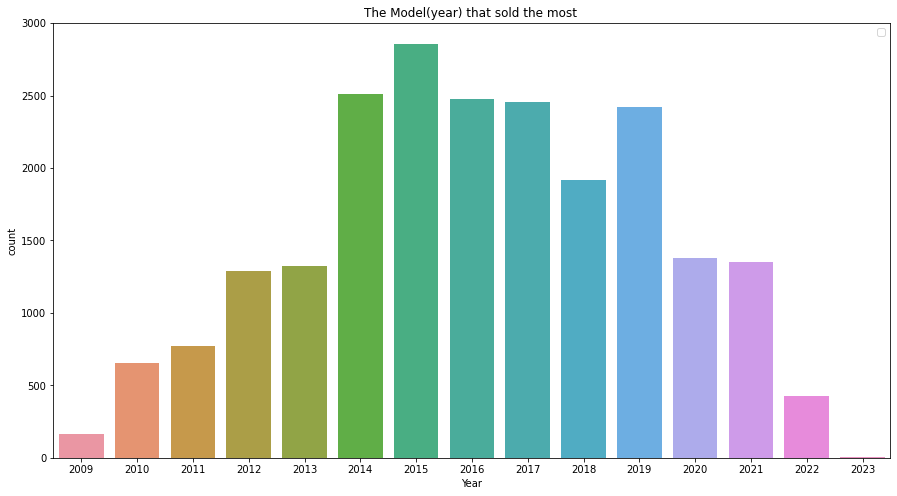

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(x='Year', data=new_df);
plt.title("The Model(year) that sold the most ")
plt.legend()
plt.show()

From the countplot, we can see that the 2015 car models have sold the most

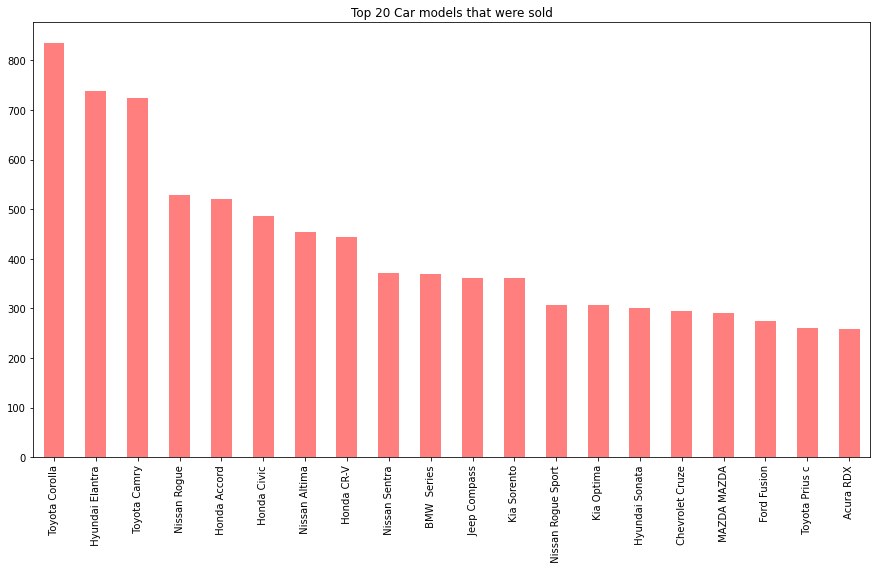

In [94]:
plt.figure(figsize = (15,8))
data['Name'].value_counts().head(20).plot.bar(color='r', alpha=0.5)
plt.title("Top 20 Car models that were sold")
plt.show()

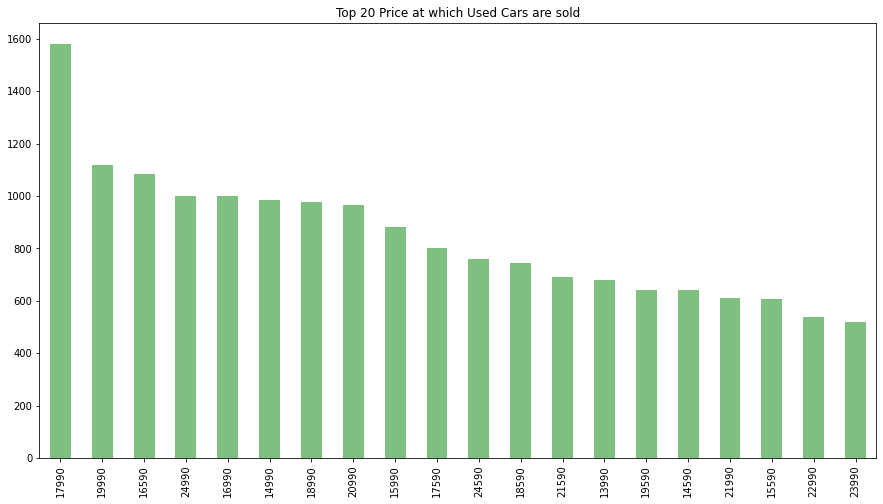

In [95]:
plt.figure(figsize = (15,8))
data['Price'].value_counts().head(20).plot.bar(color='g', alpha=0.5)
plt.title("Top 20 Price at which Used Cars are sold")
plt.show()

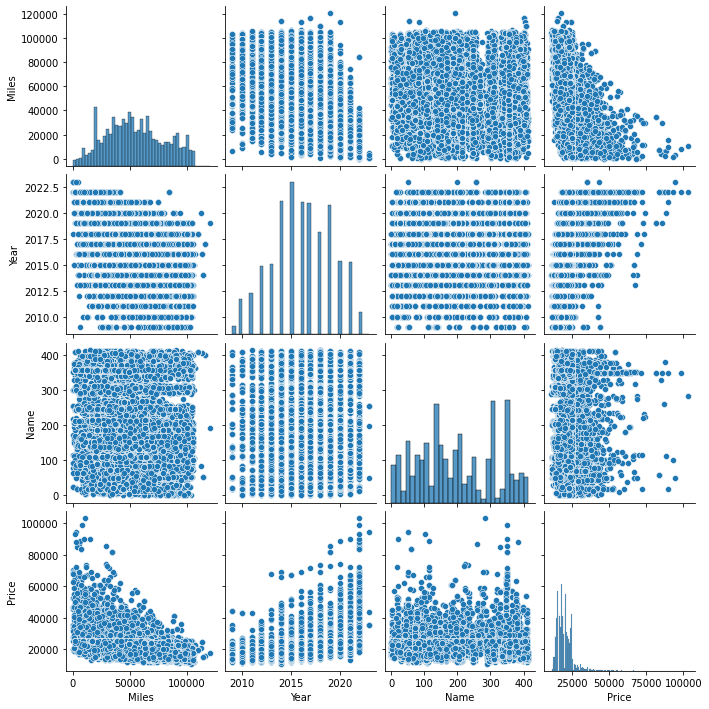

In [96]:
sns.pairplot(new_df);

In [97]:
new_df1=new_df1.drop(['Name'], axis=1)
new_df1.head()

,Miles,Year,Price
0,41946,2018,16990
1,45328,2020,23990
2,81068,2012,21590
3,35372,2019,21590
4,68992,2017,22990


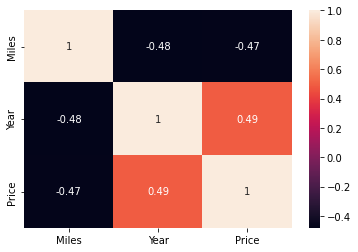

In [98]:
sns.heatmap(new_df1.corr(), annot=True);

From the pairplot and the heatmap, it is clear that the features, 'Year' and 'Price' are negatively correlated with 'Miles'. That is, as the number of miles driven increases the price of the car decreases. The feature 'Year' is positively correlated with 'Price', ie, The more recent the car is manufactured, the more price it fetches.

## **Model building**

**Linear Regression**

In [99]:
df2=new_df1["Price"]
new_df1=new_df1.drop(["Price"], axis=1)

In [100]:
X=new_df1
y=df2
print(X.shape)
y.shape

(22000, 2)


(22000,)

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=0)

In [102]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [103]:
regressor.fit(X_train,y_train) # fit the model with the training set

LinearRegression()

In [104]:
y_pred=regressor.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [106]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error = ", mse)
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", mae)
print("Root Mean Squared Error = ", np.sqrt(mse))
print("R2 Score = ", r2_score(y_test, y_pred))
adj_r2=1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2 = ", adj_r2)

Mean Squared Error =  28317104.274382737
Mean Absolute Error =  3405.384091352637
Root Mean Squared Error =  5321.381801222567
R2 Score =  0.32571681233086636
Adjusted R2 =  0.31537616008173885


**Decision Tree Regression**

In [107]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0)

In [108]:
model.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [109]:
y_predict=model.predict(X_test)

In [110]:
mse_1=mean_squared_error(y_test, y_predict)
print("MSE = ", mse_1)
mae_1=mean_absolute_error(y_test, y_predict)
print("MAE = ", mae_1)
print("RMSE = ", np.sqrt(mse_1))
print("R2 Score = ", r2_score(y_test, y_predict))
print("Adjusted R2 = ", 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MSE =  230524.20464501774
MAE =  29.755351226551227
RMSE =  480.1293624066515
R2 Score =  0.9945107877543978
Adjusted R2 =  0.9952732191664064
